# lab three: sounds about right

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.io import wavfile
from IPython.display import display, Audio

sns.set(font_scale=1.4)

class Sound:
    """ a sound, can be played, volume adjusted or appended

    Attributes:
        x (np.array): an array representing the sound. either
            1d (mono) or 2d (stereo) (see note above)
        rate (int): frequency, in hertz, that the signal x
            should be played at
    """

    def __init__(self, x, rate):
        self.x = x.astype(np.int16)
        self.rate = rate
    
    def __mul__(self, scale):
        """ changes the volume of the audio
        
        Args: 
            scale (float): value in range(0, 2)
        """
        assert scale <= 2
        
        y = self.x * scale
        return Sound(y, self.rate)
        
    def __and__(self, other):
        """ joins sounds together
        
        other (Sound):
        """
        assert self.rate == other.rate
        
        z = np.append(self.x, other.x, axis = 0)
        return Sound(z, self.rate)
    
    def plot(self):
        """ produces a graph of the audio signal
        """
        plt.figure()
        plt.plot(self.x)
        
        plt.xlabel("signal")
        plt.ylabel("time")
        plt.title("audio visual")
        
    def __add__(self, other):
        """ overlays a sound on top of another
        
        Args:
            other (Sound):
        """
        assert self.rate == other.rate
        
        if self.x.shape[0] < other.x.shape[0]:
            new_self = np.append(self.x, np.zeros())
            new_self = np.vstack((self.x, np.zeros((other.x.shape[0] - self.x.shape[0]))))
            new = new_self.x + other.x
            return new
        
        elif self.x.shape[0] > other.x.shape[0]:
            new_other = np.vstack((other.x, np.zeros((self.x.shape[0] - other.x.shape[0]))))
            new = self.x + new_other.x
            return new
        
        new = self.x + other.x
        return new
    
    @classmethod
    def from_wav_file(cls, file):
        """ loads sound from a Wav file
        
        Args:
            file (str): file name (needn't have full path if
                file is in same folder as this ipynb)
        """
        rate, x = wavfile.read(str(file))
        return Sound(x=x, rate=rate)
    
    def to_wav_file(self, file):
        """ save sound to a Wav file
        
        Args:
            file (str): file name (needn't have full path if
                file is in same folder as this ipynb)
        """
        wavfile.write(file, self.rate, self.x)

    def build_jupyter_player(self):
        """ builds and displays jupyter player of sound """
        display(Audio((self.x[:, 0], self.x[:, 1]), 
                      rate=self.rate))

# Part A
Build `Sound.__mul__()` - multiplies the audio signal by some constant
- values > 1 will increase volume
- if value is between 0 and 1 will decrease volume
- WARNING: be mindful you don't increase the magnitude greater than 2 times the original volume ... it can break your speakers or ears


In [28]:
thud = Sound.from_wav_file(file='sound_wav/thud_STEREO.wav')

thud.build_jupyter_player()

In [3]:
(thud * 1.2).build_jupyter_player()

In [4]:
(thud * .3).build_jupyter_player()

In [5]:
thud.build_jupyter_player()

# Part B
build `Sound.__and__()` which appends one noise onto the end of another.

Be sure to ensure that the sounds have the same `rate`, otherwise they can't be appended.

You may find that [append()-ing one array to the other](lab3_hint.ipynb) is helpful functionality.


In [6]:
thud = Sound.from_wav_file(file='sound_wav/thud_STEREO.wav')

x = thud & thud & thud & thud
x.build_jupyter_player()

In [7]:
thud.build_jupyter_player()

# Part C

Build `Sound.plot()` which produces a graph of the audio signal:

<img src="https://i.ibb.co/GRpy2jj/thud.png" width=400>


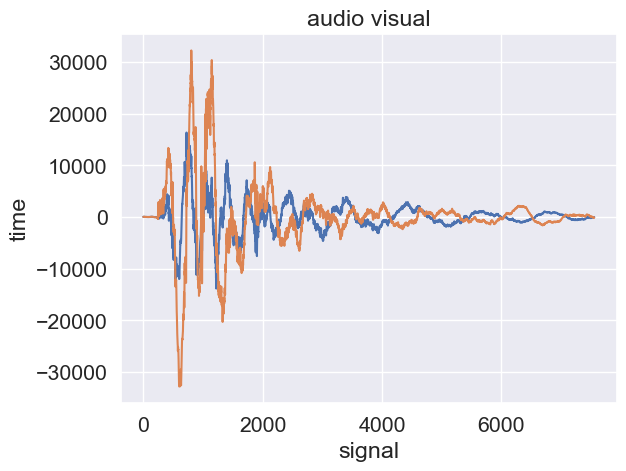

In [16]:
thud.plot()

# Part D

Build `Sound.__add__()` which overlays one sound on top of another.

- Be sure to ensure that the sounds have the same `rate`, otherwise they can't be added.
- Be mindful that you make a NEW array which is the sum of the other two
    - When we add `sound0 + sound1`, we should get a new `sound` while `sound0` and `sound1` are unmodified
- Given we can only add arrays of the same size, you may have to `np.append()` `np.zeros()` to the end of the shorter one
    - [append() example](lab4_hint.ipynb)


In [37]:
# load two noises
waterdrop = Sound.from_wav_file(file='sound_wav/waterdrop_STEREO.wav')
drumroll = Sound.from_wav_file(file='sound_wav/buzz-roll_STEREO.wav')


In [38]:
# waterdrop is a short noise, we'll concatenate a few
leaky_faucet = (waterdrop & waterdrop & waterdrop & waterdrop & waterdrop & waterdrop & waterdrop)
leaky_faucet.build_jupyter_player()


In [39]:
# should play a leaky_faucet noise while the drum roll is playing
(leaky_faucet + drumroll).build_jupyter_player()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1651

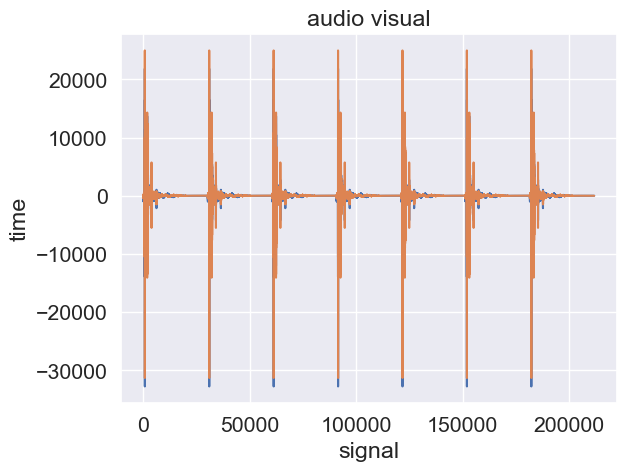

In [40]:
leaky_faucet.plot()

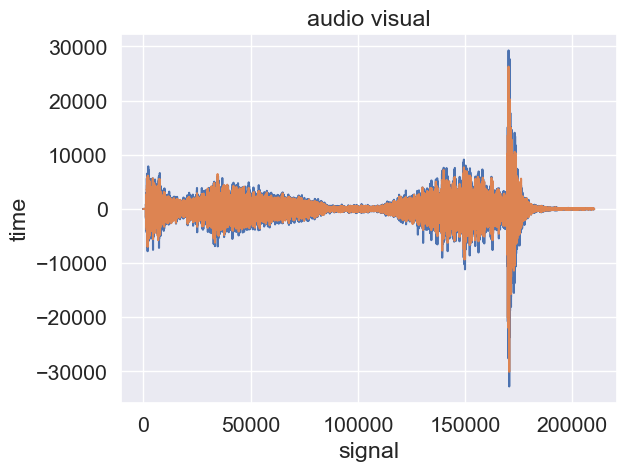

In [41]:
drumroll.plot()

In [ ]:
(leaky_faucet + drumroll).plot()

In [44]:
# check that original noise is not impacted by above
waterdrop.build_jupyter_player()

In [43]:
# check that original noise is not impacted by above
drumroll.build_jupyter_player()

In [42]:
# check that original noise is not impacted by above
leaky_faucet.build_jupyter_player()